## BA 545 Course Project 2: Machine Team 4 
#### Online Shoppers Purchasing Intentions
##### Michael Disanto, Dawn Massey PhD CPA CGMA, Brian Nicholls
###### Initial Feature Selected Models (3) - Spring 2020
----------------------------------------------------------------------


### **Table of Contents:**

0. [Preparing for analyisis](#part3.0)
1. [Initial review and vizualization of the data](#part3.1)
2. [Process the data for Initial Data Models](#part3.2)
3. [Split and run the initial model with selected features](#part3.3)


## 0. Preparing for Analysis  <a name="part3.0"></a>
####  Import the necesary packages for reading, analyzing, tidying, medeling, & evaluating the data

In [1]:
# TO USE FOR ENTIRE TEAM
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Excluding Items not in Fairfield Jupiter Lab
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [3]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test
from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)
from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
from sklearn.svm import SVC 
# svc = SVC(kernel='linear')
from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)
from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)


from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss 

# 1. Initial review and vizualization of the data  <a name="part3.1"></a>

In [4]:
# Pull in our original data and a copy for the base model
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')
df_base = df.copy()

In [5]:
# verify that the datatypes have change based on encoding
display(df_base.info())
display(df_base.describe())
display(df_base.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

None

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


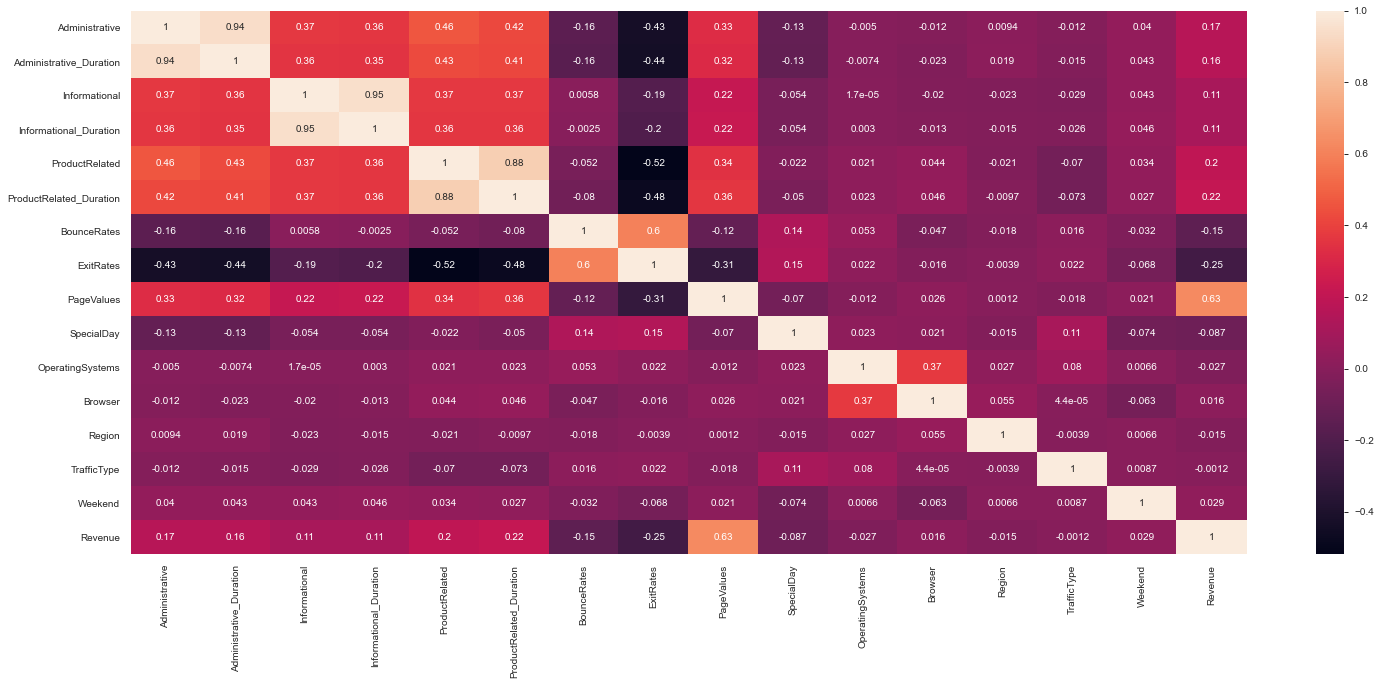

In [6]:
# Correlation Heatmap for the dataframe
spearman =df.corr(method ='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(spearman, annot=True)

# 2. Process the data for Initial Data Models  <a name="part3.2"></a>

    2.0 Pipeline [Prep] - Create subsets and list to be used later in the pipeline:

In [7]:
df_continuous = df.iloc[:,:9]
df_categorical = df.iloc[:,9:-1]
categorical_df_list = df_categorical.columns.tolist()
continuous_df_list = df_continuous.columns.tolist()

    2.1 Pipeline [Impute] - Initial Imputation of Categorical Features:

In [8]:
# Pipeline - Initial Imputation of Categorical Features:

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
df.groupby('VisitorType').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
VisitorType,,,,,,,,,,,,,,,,,
New_Visitor,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694
Returning_Visitor,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636


In [9]:
# Encode Revenue before splitting the data to allow for modeling

enc = LabelEncoder()

df['VisitorType'] = enc.fit_transform(df['VisitorType'])
df['Weekend'] = enc.fit_transform(df['Weekend'])
df['Revenue'] = enc.fit_transform(df['Revenue'])

In [10]:
# Pipeline - Binning Categorical Features:

def holiday_bin_func(month) :
    if month == 'May':
        return int(1)
    elif month == 'Feb':
        return int(1)
    else:
        return int(0)
    
df['Holiday_Bin'] = df['Month'].apply(holiday_bin_func)

##Reduce months to the top 4 in which there are transactions and "other"
def month_bin_func(month) :
    if month == 'May':
        return int(5)
    elif month == 'Nov':
        return int(11)
    elif month == 'Mar':
        return int(3)
    elif month == 'Dec':
        return int(12)
    else:
        return int(0)
    
df['Month_Bin'] = df['Month'].apply(month_bin_func)


##Encode month names to numerical representations

def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

df['Month'] = df['Month'].apply(month_func)

def month_quarterly_func(month) :
    if month <= 3:
        return int(1)
    elif month >= 4 and month <= 6:
        return int(2)
    elif month >= 7 and month <= 9:
        return int(3)
    elif month >= 10 and month <= 12:
        return int(4)

df['Quarter'] = df['Month'].apply(month_quarterly_func)

##Reduce categories for Operating Systems to the top 3 plus "other"
### Operating Systems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 
def binning_operating_systems(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Operating Systems > 3

df['OperatingSystems_Bin']=df['OperatingSystems'].apply(binning_operating_systems)   # Creating a new column in the df


      
##Reduce categories for Browser to the top 3 plus "other"
### Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).
def binning_browser(B):
    if (B == 3) or (B > 4): 
        return(3) 
    else:
        return(B) 

df['Browser_Bin']=df['Browser'].apply(binning_browser)   # Creating a new column in the df
      
      
##Reduce categories for Region to the top 4 plus "other"
### Region – is a categorical variable for region from which the visitor came. The top four account for ~77% of the data (i.e., region 1, 3, 4, 2).
def binning_region(B):
    if (B <= 4):
        return(B)
    else:
        return(5) # creating a category of 5 for all Regions > 4

df['Region_Bin']=df['Region'].apply(binning_region)   # Creating a new column in the df

      
      
##Reduce categories for TrafficType to the top 3 plus "other"
### TrafficType – is a categorical variable to indicate how visitor arrived at website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).
def binning_traffic_type(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Traffic Types > 3

df['TrafficType_Bin']=df['TrafficType'].apply(binning_traffic_type)   # Creating a new column in the df

In [12]:
# add creates features / bins to categorical list
## Create added features list
added_categorical_features = df.iloc[:,-7:]
added_categorical_list = added_categorical_features.columns.tolist()

# Combine added features with categorical list
categorical_df_list = categorical_df_list + added_categorical_list

#Check work by printing categorical list
categorical_df_list

    2.2 Pipeline [Transform] - Initial Log Transformation Continuous Features:

In [15]:
# Initial Log Transformation Continuous Features

# Impute Zeros before doing the log
for column in continuous_df_list:
    df[column] = df[column] + 1

display(df[continuous_df_list].sample(20))

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
873,9,275.500000,1,1.000000,25,516.575758,1.000000,1.003704,1.000000
3302,1,1.000000,1,1.000000,46,1439.722222,1.004545,1.027727,1.000000
6373,2,16.100000,1,1.000000,10,249.050000,1.000000,1.018750,1.000000
8206,3,387.000000,1,1.000000,73,713.296078,1.000000,1.000913,1.000000
7994,6,210.625000,3,119.750000,22,399.000000,1.006897,1.021839,1.000000
9667,4,41.500000,1,1.000000,21,759.750000,1.000000,1.020000,39.266679
6043,1,1.000000,1,1.000000,44,1607.450000,1.000000,1.004762,19.515055
439,4,51.000000,1,1.000000,14,797.000000,1.000000,1.013333,1.000000
5649,4,37.300000,1,1.000000,14,310.550000,1.000000,1.029167,1.000000
10036,5,20.666667,4,255.916667,148,4255.666667,1.008446,1.019250,1.000000


    2.3 Pipeline [Calcualated Features] - Initial Feature Engineering of continuous features:

In [16]:

df['PageValues_Log'] = np.log(df['PageValues'])

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_Bounce'] = df['Administrative'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Exit'] = df['Administrative_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Bounce'] = df['Administrative_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Info_per_Exit'] = df['Informational'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_per_Bounce'] = df['Informational'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Exit'] = df['Informational_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Bounce'] = df['Informational_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Product_per_Exit'] = df['ProductRelated'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_per_Bounce'] = df['ProductRelated'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Exit'] = df['ProductRelated_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Bounce'] = df['ProductRelated_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Bounce_Exit_Rate_Avg' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2
df['Bounce_Exit_Rate_WeightedAvg'] = ((df['BounceRates']*.6) + (df['ExitRates']*.4))
df['Bounce_Exit_Rate_Avg_PageVales'] = (df['Bounce_Exit_Rate_Avg'] / df['PageValues']) # add a chart to compare the trends and distributions

#Create 'Bounce_per_Exit_Rate' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']


df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Administrative_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Informational_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['ProductRelated_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


#Create 'Total_Duration' and 'Total_Duration_Avg' to enable us to assess total and average duration, respectively.
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Duration_Avg'] = (df['Total_Duration'])/3
df['Admin_Duration_percent_TotalDuration'] = df['Administrative_Duration'] / df['Total_Duration']
df['Info_Duration_percent_TotalDuration'] = df['Informational_Duration'] / df['Total_Duration']
df['Product_Duration_percent_TotalDuration'] = df['ProductRelated_Duration'] / df['Total_Duration']
df['TotalDuration_per_PageValues'] = df['Total_Duration'] / df['PageValues']
df['TotalDuration_per_ExitRates'] = df['Total_Duration'] / df['ExitRates']
df['TotalDuration_per_BounceRates'] = df['Total_Duration'] / df['BounceRates']
df['TotalDuration_per_BounceExit_avg'] = df['Total_Duration'] / df['Bounce_Exit_Rate_Avg']


#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_PageValues'] = df['Administrative'] / df['PageValues']
df['AdminDuration_per_PageValues'] = df['Administrative_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Informational_per_PageValues'] = df['Informational'] / df['PageValues']
df['Info_Duration_per_PageValues'] = df['Informational_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['ProductRelated_per_PageValues'] = df['ProductRelated'] / df['PageValues']
df['Product_Duration_per_PageValues'] = df['ProductRelated_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Exit_per_PageValues'] = df['ExitRates'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_PageValues'] = df['BounceRates'] / df['PageValues']


In [17]:
# Add transformed and calulated featuers to continuous list

# Create added features list
added_continuous_features = df.iloc[:,-36:]
added_continuous_list = added_continuous_features.columns.tolist()

In [18]:
# Combine added features list with continuous list
continuous_df_list = continuous_df_list + added_continuous_list

In [19]:
# Check work by printing the combined list
continuous_df_list

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'PageValues_Log',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Admin_dur_per_Exit',
 'Admin_dur_per_Bounce',
 'Info_per_Exit',
 'Info_per_Bounce',
 'Info_dur_per_Exit',
 'Info_dur_per_Bounce',
 'Product_per_Exit',
 'Product_per_Bounce',
 'Product_dur_per_Exit',
 'Product_dur_per_Bounce',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_Exit_Rate',
 'Admin_per_bounce_exit_avg',
 'Admin_dur_per_bounce_exit_avg',
 'Total_Duration',
 'Total_Duration_Avg',
 'Admin_Duration_percent_TotalDuration',
 'Info_Duration_percent_TotalDuration',
 'Product_Duration_percent_TotalDuration',
 'TotalDuration_per_PageValues',
 'TotalDuration_per_ExitRates',
 'TotalDuration_per_BounceRates',
 'TotalDuration_per_BounceExit_avg',
 'Admin_per_PageValues',
 'AdminDuration_per_

In [20]:
# review the created columns in a sample
new_continuous_df = df.loc[:,continuous_df_list]
y = df.loc[:,'Revenue']
display(new_continuous_df.sample(20))

new_categorical_df = df.loc[:,categorical_df_list]
display(new_categorical_df.sample(20))


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,PageValues_Log,...,TotalDuration_per_BounceRates,TotalDuration_per_BounceExit_avg,Admin_per_PageValues,AdminDuration_per_PageValues,Informational_per_PageValues,Info_Duration_per_PageValues,ProductRelated_per_PageValues,Product_Duration_per_PageValues,Exit_per_PageValues,Bounce_per_PageValues
4291,1,1.000000,1,1.000000,3,1.000000,1.000000,1.200000,1.000000,0.000000,...,3.000000,2.727273,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.200000,1.000000
1921,5,204.833333,1,1.000000,31,824.500000,1.000000,1.001667,1.000000,0.000000,...,1030.333333,1029.475437,5.000000,204.833333,1.000000,1.000000,31.000000,824.500000,1.001667,1.000000
2949,1,1.000000,1,1.000000,53,1193.317857,1.006410,1.033013,1.000000,0.000000,...,1187.704368,1172.211760,1.000000,1.000000,1.000000,1.000000,53.000000,1193.317857,1.033013,1.006410
10139,10,117.541667,5,209.666667,58,1814.250382,1.003030,1.011898,31.609556,3.453459,...,2134.989052,2125.593445,0.316360,3.718548,0.158180,6.633015,1.834888,57.395629,0.032012,0.031732
8691,5,69.500000,1,1.000000,153,5427.823764,1.005229,1.018757,1.000000,0.000000,...,5469.723901,5433.165035,5.000000,69.500000,1.000000,1.000000,153.000000,5427.823764,1.018757,1.005229
6755,1,1.000000,1,1.000000,2,1.000000,1.200000,1.200000,1.000000,0.000000,...,2.500000,2.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.200000,1.200000
4511,7,71.500000,3,10.000000,26,2853.000000,1.013333,1.043333,1.000000,0.000000,...,2895.888159,2853.646678,7.000000,71.500000,3.000000,10.000000,26.000000,2853.000000,1.043333,1.013333
2687,4,92.833333,1,1.000000,12,535.000000,1.015385,1.015385,45.296615,3.813232,...,619.305556,619.305556,0.088307,2.049454,0.022077,0.022077,0.264920,11.811037,0.022416,0.022416
8661,1,1.000000,1,1.000000,3,1.000000,1.200000,1.200000,1.000000,0.000000,...,2.500000,2.500000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.200000,1.200000
1028,1,1.000000,1,1.000000,13,262.000000,1.033333,1.083333,1.000000,0.000000,...,255.483871,249.448819,1.000000,1.000000,1.000000,1.000000,13.000000,262.000000,1.083333,1.033333


,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Holiday_Bin,Month_Bin,Quarter,OperatingSystems_Bin,Browser_Bin,Region_Bin,TrafficType_Bin
4159,0.2,5,2,2,6,4,1,0,1,5,2,2,2,5,4
4676,0.6,5,2,2,4,1,1,0,1,5,2,2,2,4,1
5555,0.0,6,2,2,1,7,1,0,0,0,2,2,2,1,4
1796,0.0,3,2,4,1,1,1,0,0,3,1,2,4,1,1
4814,1.0,5,2,2,1,3,1,1,1,5,2,2,2,1,3
1258,0.0,3,2,2,1,2,1,0,0,3,1,2,2,1,2
10436,0.0,12,1,1,1,1,1,0,0,12,4,1,1,1,1
1144,0.0,3,2,5,3,6,1,0,0,3,1,2,3,3,4
10694,0.0,11,2,2,1,2,1,0,0,11,4,2,2,1,2
3022,0.8,5,2,2,3,1,1,0,1,5,2,2,2,3,1


    2.4 Pipeline [Middle] - Min Max Standardization

In [21]:
# process the attributes that have a range outside of zero to one (0 - 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scale = scaler.fit(new_continuous_df)
scaled = scaler.transform(new_continuous_df)
scaled_continuous_df = pd.DataFrame(scaled,columns = continuous_df_list)
df[continuous_df_list] = scaled_continuous_df[continuous_df_list]

    2.5 Pipeline [Middle] - Normalize the data to address skew

In [22]:
# Initially displaying the skewness of all attributes
skew_df = pd.DataFrame(df[continuous_df_list].skew().abs())

#filter skew attributes by absolute values of 0.5
skew_over = skew_df[(skew_df > 0.5).any(axis=1)]
skew_cols = skew_over.index.tolist()
display(skew_cols)
display(len(skew_cols))

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'PageValues_Log',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Admin_dur_per_Exit',
 'Admin_dur_per_Bounce',
 'Info_per_Exit',
 'Info_per_Bounce',
 'Info_dur_per_Exit',
 'Info_dur_per_Bounce',
 'Product_per_Exit',
 'Product_per_Bounce',
 'Product_dur_per_Exit',
 'Product_dur_per_Bounce',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_Exit_Rate',
 'Admin_per_bounce_exit_avg',
 'Admin_dur_per_bounce_exit_avg',
 'Total_Duration',
 'Total_Duration_Avg',
 'Admin_Duration_percent_TotalDuration',
 'Info_Duration_percent_TotalDuration',
 'Product_Duration_percent_TotalDuration',
 'TotalDuration_per_PageValues',
 'TotalDuration_per_ExitRates',
 'TotalDuration_per_BounceRates',
 'TotalDuration_per_BounceExit_avg',
 'Admin_per_PageValues',
 'AdminDuration_per_

45

In [23]:
# creating the list of cols to adjust for skewness

for i in skew_cols:
    df[i+'_skew'] = df[i]
    
cols_to_skew = df.iloc[:,-len(skew_cols):].columns

continuous_skew_cols = cols_to_skew.tolist()
continuous_df_list = continuous_df_list + continuous_skew_cols

In [25]:
# Normalize using quantile_transform for columns that have skewness

from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(df[cols_to_skew],random_state=0,copy=True)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = cols_to_skew)
df[cols_to_skew] = transformed_qt_df[cols_to_skew]


In [26]:
#Display the skewness after quantile_transform
display(df[cols_to_skew].skew())

Administrative_skew                            0.114415
Administrative_Duration_skew                   0.144551
Informational_skew                             1.419557
Informational_Duration_skew                    1.557548
ProductRelated_skew                           -0.009360
ProductRelated_Duration_skew                  -0.032811
BounceRates_skew                               0.085643
ExitRates_skew                                 0.028881
PageValues_skew                                1.365839
PageValues_Log_skew                            1.365839
Admin_per_Exit_skew                           -0.028204
Admin_per_Bounce_skew                         -0.014286
Admin_dur_per_Exit_skew                       -0.029313
Admin_dur_per_Bounce_skew                     -0.018813
Info_per_Exit_skew                            -0.028867
Info_per_Bounce_skew                          -0.089731
Info_dur_per_Exit_skew                        -0.029179
Info_dur_per_Bounce_skew                      -0

In [27]:
# Create a list for columns that still need to be adjusted for skewness
Still_skew_df = pd.DataFrame(df[cols_to_skew].skew().abs())

#filter skew attributes by absolute values of 0.5
still_skew_over = Still_skew_df[(Still_skew_df > 0.5).any(axis=1)]
# still_skew_under = Still_skew_df[(Still_skew_df < -0.5).any(axis=1)]
still_skew_list =(still_skew_over.index.tolist())

display(still_skew_list)



['Informational_skew',
 'Informational_Duration_skew',
 'PageValues_skew',
 'PageValues_Log_skew',
 'Admin_per_PageValues_skew']

In [28]:
## I THINK WE CAN DELETE THIS 
# creating a list of columns that need to be transformed due to skewness

# cols_to_skew_2 = ['Informational_skew','Informational_Duration_skew', 'PageValues_skew', 'PageValues_Log_skew', 'PageValues_Log10_skew', 'Holiday_Bin_skew']

In [30]:
# Normalize for remaining columns that continue to have skewness using PowerTransformer
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transform = pt.fit(df[still_skew_list])
transformed = pt.transform((df[still_skew_list]))
transformed_df = pd.DataFrame(transformed,columns = still_skew_list)
df[still_skew_list] = transformed_df[still_skew_list]


In [31]:
# check for remaining skewness
display(df[still_skew_list].skew())

Informational_skew             1.399378
Informational_Duration_skew    1.539400
PageValues_skew                1.342178
PageValues_Log_skew            1.342178
Admin_per_PageValues_skew      0.189768
dtype: float64

# 3. Split and run the initial Model with selected features  <a name="part3.3"></a>

In [32]:
#Create a list of continuous and categorica features based on additional data preparation
continuous_categorical_list = continuous_df_list + categorical_df_list

# Resplit features (X) and target (y) in the dataset
X,y = df.loc[:,continuous_categorical_list],df.loc[:,'Revenue']

In [33]:
# resplit based on additional data prep completed post initial split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=500) 

### 3.1 Naive Bayes Model (NB)
>   <b> F1 Score: </b> .88
<br><b> AUC: </b> .87
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [34]:
# import the metrics class
from sklearn import metrics
# from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# import other required modules for confusion matrices
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#### Specify the Model and run Forward Selection Feature Importance

In [35]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

In [36]:
# Source: https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f
# Forward Selection Feature Importance to determine the best features for this model

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [39]:
best_features = forward_selection(X_train, y_train, significance_level=0.05)

#### Generate Test Data, Build the Model & Assess the Model

y Accuracy: 0.8764530954311976

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3158
           1       0.55      0.79      0.65       541

    accuracy                           0.88      3699
   macro avg       0.76      0.84      0.79      3699
weighted avg       0.90      0.88      0.89      3699



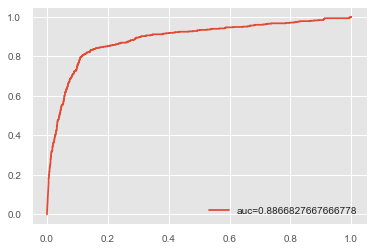

Text(0.5, 257.44, 'Predicted label')

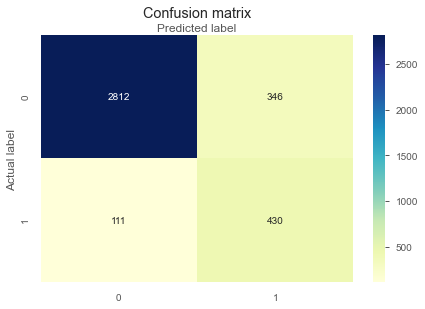

In [40]:
#Train the model using the training sets - for y (Sale)
gnb.fit(X_train[best_features], y_train)

#Predict the response for test dataset for y
y_NB_pred = gnb.predict(X_test[best_features])

# Model Accuracy, how often is the classifier correct?
# Accuracy for y
print("y Accuracy:",metrics.accuracy_score(y_test, y_NB_pred))
print("")

#Can use classification report to assess model adequacy, too
class_names=[0,1] # name  of classes
print(metrics.classification_report(y_test, y_NB_pred, labels=class_names))

#AUC for y
y_NB_pred_proba = gnb.predict_proba(X_test[best_features])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_NB_pred_proba)
auc = metrics.roc_auc_score(y_test, y_NB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_NB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


##### Conclusion - With an F1 score of .88 the Naive Bayes model is superior to the base model which had an F1 of .71. However, there is still room for improvement.

### 3.2 Decision Tree Model (DT)
>   <b> F1 Score: </b> .87
<br><b> AUC: </b> .73
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [55]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#### Specify the Model and run Feature Selection

In [56]:
# Think we can delete this
clf = DecisionTreeClassifier()

In [57]:
# Using SelectFromModel to run feature selecion
from sklearn.feature_selection import SelectFromModel

embeded_dt_selector = SelectFromModel(DecisionTreeClassifier(), max_features=10)
embeded_dt_selector.fit(X_train, y_train)
embeded_dt_support = embeded_dt_selector.get_support()
embeded_dt_feature = X_train.loc[:,embeded_dt_support].columns.tolist()
print(str(len(embeded_dt_feature)), 'selected features')
print(embeded_dt_feature)

10 selected features
['Bounce_Exit_Rate_Avg', 'Bounce_per_Exit_Rate', 'TotalDuration_per_PageValues', 'Admin_Duration_percent_TotalDuration_skew', 'Info_Duration_percent_TotalDuration_skew', 'Admin_per_PageValues_skew', 'Exit_per_PageValues_skew', 'Month', 'Month_Bin', 'Quarter']


#### Build the Model

In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train[embeded_dt_feature],y_train)

#Predict the response for test dataset
y_DT_pred = clf.predict(X_test[embeded_dt_feature])

In [59]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred))

Accuracy: 0.8661800486618005


#### Assess the Model

In [60]:
# Evaluating the Classification Report
print(metrics.classification_report(y_test, y_DT_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3158
           1       0.54      0.55      0.55       541

    accuracy                           0.87      3699
   macro avg       0.73      0.74      0.73      3699
weighted avg       0.87      0.87      0.87      3699



In [61]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_DT_pred))

[[2905  253]
 [ 242  299]]


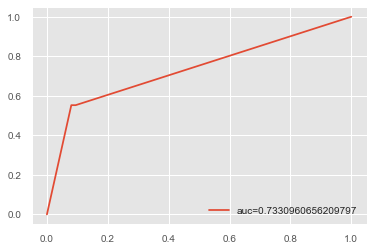

Text(0.5, 257.44, 'Predicted label')

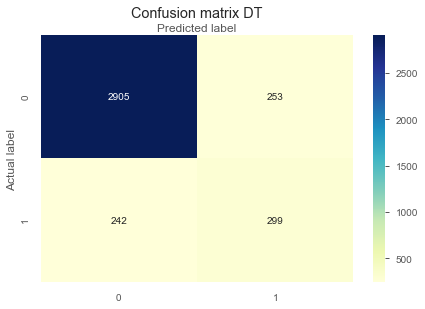

In [63]:
#AUC for y
y_DT_pred_proba = clf.predict_proba(X_test[embeded_dt_feature])[::,1]
fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_DT_pred_proba)
auc_DT = metrics.roc_auc_score(y_test, y_DT_pred_proba)
plt.plot(fpr_DT,tpr_DT,label="auc="+str(auc_DT))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_DT = metrics.confusion_matrix(y_test, y_DT_pred)
cnf_matrix_DT
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Conclusion - With an F1 score of .87 the Decision Tree model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

#### Model Optimization 

>   <b> F1 Score: </b> .89
<br><b> AUC: </b> .90

In [64]:
# Trying to optimize Decision Tree Model by adding in the parameters "entropy" (information gain selection measure) and "max depth=3"
# # Did this in order to reduce to complexity of the Decision Tree, in hopes that it will yield better results
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion = "entropy", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train[embeded_dt_feature],y_train)

#Predict the response for test dataset
y_DT_pred2 = clf2.predict(X_test[embeded_dt_feature])

In [65]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred2))

Accuracy: 0.8980805623141389


In [66]:
# Evaluating the Classification Report
print(metrics.classification_report(y_test, y_DT_pred2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.68      0.57      0.62       541

    accuracy                           0.90      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



[[3015  143]
 [ 234  307]]


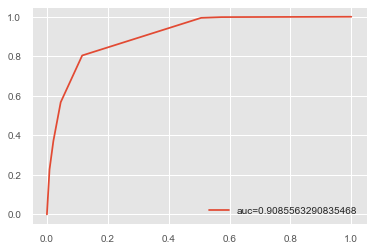

Text(0.5, 257.44, 'Predicted label')

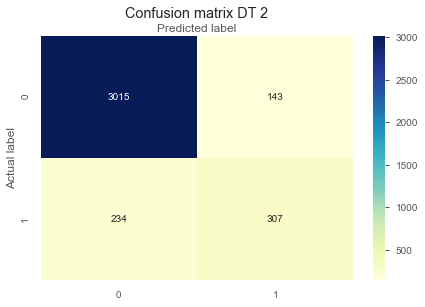

In [67]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_DT_pred2))

#AUC for y
y_DT_pred_proba2 = clf2.predict_proba(X_test[embeded_dt_feature])[::,1]
fpr_DT2, tpr_DT2, _ = metrics.roc_curve(y_test,  y_DT_pred_proba2)
auc_DT2 = metrics.roc_auc_score(y_test, y_DT_pred_proba2)
plt.plot(fpr_DT2,tpr_DT2,label="auc="+str(auc_DT2))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_DT2 = metrics.confusion_matrix(y_test, y_DT_pred2)
cnf_matrix_DT2
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT 2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Conclusion - Optimized Model yielded an F1 score of .89, which is superior to the base model (.71) and well as the pre-optimized Decision Tree Model (.87)

In [53]:
# THINK WE CAN DELETE THIS

# Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [54]:
# THINK WE CAN DELETE THIS AS WELL
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

### 3.3 Random Forest Model (RF)
>   <b> F1 Score: </b> .90
<br><b> AUC: </b> .92
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model and run Feature Selection

In [68]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [69]:
# Using SelectFromModel to run Feature Selection

from sklearn.feature_selection import SelectFromModel

embeded_rf_selector = SelectFromModel(RandomForestClassifier(), max_features=10)
embeded_rf_selector.fit(X_train, y_train)
embeded_rf_support = embeded_lr_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

10 selected features
['PageValues_Log', 'Admin_Duration_percent_TotalDuration', 'Admin_per_PageValues', 'Bounce_Exit_Rate_Avg_skew', 'Bounce_per_Exit_Rate_skew', 'Info_Duration_percent_TotalDuration_skew', 'TotalDuration_per_PageValues_skew', 'Admin_per_PageValues_skew', 'Month', 'Month_Bin']


#### Build/Assess the Model

In [70]:
#Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train[embeded_rf_feature],y_train)

y_RF_pred = rfc.predict(X_test[embeded_rf_feature])

In [71]:
# Evaluation of the Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_RF_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.67      0.61      0.64       541

    accuracy                           0.90      3699
   macro avg       0.80      0.78      0.79      3699
weighted avg       0.90      0.90      0.90      3699



[[2995  163]
 [ 209  332]]


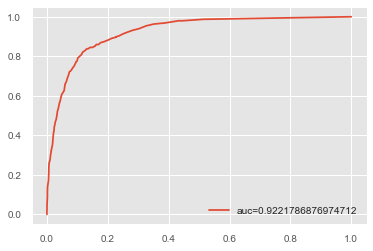

Text(0.5, 257.44, 'Predicted label')

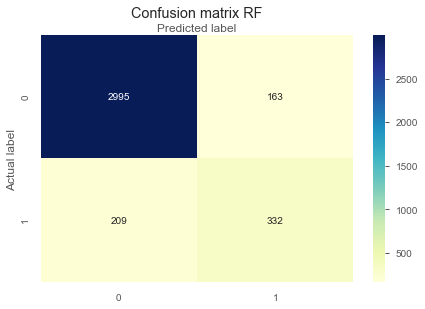

In [72]:
# Evaluation of the Confusion Matrix
print(confusion_matrix(y_test, y_RF_pred))

#AUC for y
y_RF_pred_proba = rfc.predict_proba(X_test[embeded_rf_feature])[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  y_RF_pred_proba)
auc_RF = metrics.roc_auc_score(y_test, y_RF_pred_proba)
plt.plot(fpr_RF,tpr_RF,label="auc="+str(auc_RF))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_RF_pred)
cnf_matrix_RF
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Conclusion - With an F1 score of .90 the Random Forest model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

### 3.4 Support Vector Machines (SVM) Classification Model (SVC)
>   <b> F1 Score: </b> .90
<br><b> AUC: </b> .82
<br><b> Next Steps: </b> SVC ensemble classifiers 

#### Specify the Model and run Feature Selection

In [73]:
###Specify the Model
from sklearn import svm
svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'scale', C=1, probability =True, degree = 3) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

In [79]:
# Using RFE to run feature selection

from sklearn.feature_selection import RFE
svc = svm.SVC(kernel='linear',cache_size=7000,gamma= 'auto', C=5, probability =True, degree = 5)

svc_selector = RFE(estimator=svc, n_features_to_select=10, step=5, verbose=5)
svc_selector.fit(X_train, y_train)
svc_support = svc_selector.get_support()
svc_feature = X_train.loc[:,svc_support].columns.tolist()

print(str(len(svc_feature)), 'selected features')
print(svc_feature)

Fitting estimator with 105 features.
Fitting estimator with 100 features.
Fitting estimator with 95 features.
Fitting estimator with 90 features.
Fitting estimator with 85 features.
Fitting estimator with 80 features.
Fitting estimator with 75 features.
Fitting estimator with 70 features.
Fitting estimator with 65 features.
Fitting estimator with 60 features.
Fitting estimator with 55 features.
Fitting estimator with 50 features.
Fitting estimator with 45 features.
Fitting estimator with 40 features.
Fitting estimator with 35 features.
Fitting estimator with 30 features.
Fitting estimator with 25 features.
Fitting estimator with 20 features.
Fitting estimator with 15 features.
10 selected features
['Administrative', 'PageValues', 'PageValues_Log', 'Info_dur_per_Exit', 'Bounce_Exit_Rate_Avg_PageVales', 'Admin_per_bounce_exit_avg', 'Admin_per_PageValues', 'Info_Duration_per_PageValues', 'Bounce_Exit_Rate_Avg_skew', 'Bounce_Exit_Rate_Avg_PageVales_skew']


#### Build the Model

In [80]:
#Train the model using the training sets
svc.fit(X_train[svc_feature], y_train)

#Predict the response for test dataset
y_pred_svc = svc.predict(X_test[svc_feature])

#### Assess the Model

Accuracy_svc: 0.8978102189781022
[[2987  171]
 [ 207  334]]


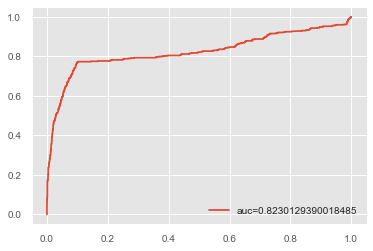


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3158
           1       0.66      0.62      0.64       541

    accuracy                           0.90      3699
   macro avg       0.80      0.78      0.79      3699
weighted avg       0.90      0.90      0.90      3699

Accuracy_svc: 0.8978102189781022


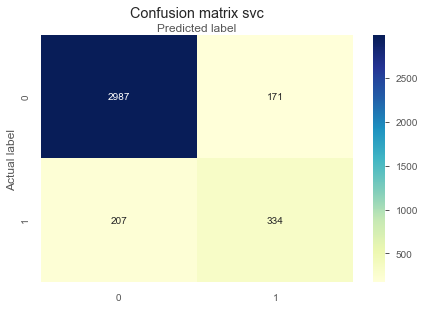

In [81]:
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)

print(cnf_matrix_svc)


#AUC for y1
y_SVM_pred_proba = svc.predict_proba(X_test[svc_feature])[::,1]
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test,  y_SVM_pred_proba)
auc_SVM = metrics.roc_auc_score(y_test, y_SVM_pred_proba)
plt.plot(fpr_SVM,tpr_SVM,label="auc="+str(auc_SVM))
plt.legend(loc=4)
plt.show()
print("")

class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_svc))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))

##### Conclusion - With an F1 score of .90 the SVM model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

### 3.5. XGBoost Model (XGB)
>   <b> F1 Score: </b> .89
<br><b> AUC: </b> .91
<br><b> RMSE: </b> .32
<br><b> Next Steps: </b> Additional parameter tuning


#### Import Needed Packages

In [82]:
#Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

#Do preliminary work


#### Specify the Model and run Feature Selection

In [83]:
#Instantiate an XGBoost Classifer Model
XGB_class = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


In [84]:
# Source: https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784
# Use LassoCV to run Feature Selection

from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101,n_jobs =10 )
regr.fit(X_train, y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 
#lasso_support = regr.get_support()

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10861772409219839, tolerance: 0.09315640839971039

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11009077274513857, tolerance: 0.09315640839971039

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09279839064504358, tolerance: 0.0914511223750906



LassoCV Best Alpha Scored:  0.00022150868006737075
LassoCV Model Accuracy:  0.44599181260507725
Variables Eliminated:  60
Variables Kept:  45


C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22072043326897983, tolerance: 0.11504910207391955



Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

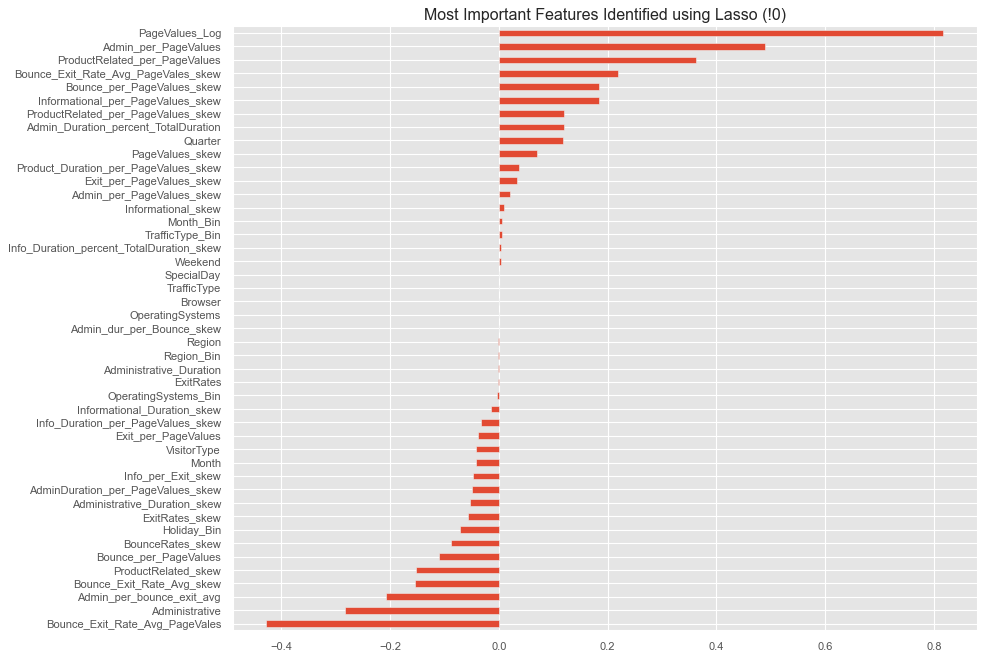

In [85]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values() # possible sort by index
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")

In [86]:
top_coef_df =pd.DataFrame(top_coef)
lasso_best =top_coef_df.tail(10).index.tolist()

#### Generate Test Data, Build the Models & Assess the Models

In [87]:
#Put Data into structure for XGBoost 
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Train the model using the training sets
XGB_class.fit(X_train[lasso_best], y_train)

#Predict the response for test dataset
y_XGB_pred = XGB_class.predict(X_test[lasso_best])

#Calculate RMSE 
rmse_XGB = np.sqrt(mean_squared_error(y_test, y_XGB_pred))
print("XGBoost's RMSE for y2 is: %f" % (rmse_XGB))

#Create error ratio to evaluate results
target_range_XGB = y.max() - y.min()
print("XGB target range is: %f" % (target_range_XGB))
error_ratio_XGB = rmse_XGB/target_range_XGB
print("XGBoost's Error Ratio for y2 is: %f" % (error_ratio_XGB))

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\xgboost\core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



XGBoost's RMSE for y2 is: 0.330073
XGB target range is: 1.000000
XGBoost's Error Ratio for y2 is: 0.330073


In [88]:
#ISSUE WITH THE ABOVE - HOW COME THE TARGET RANGE IS 1? DOES IT HAVE TO DO WITH 0/1 STATUS OF TARGET VARIABLE???

y Accuracy: 0.891051635577183

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3158
           1       0.64      0.58      0.61       541

    accuracy                           0.89      3699
   macro avg       0.79      0.76      0.77      3699
weighted avg       0.89      0.89      0.89      3699



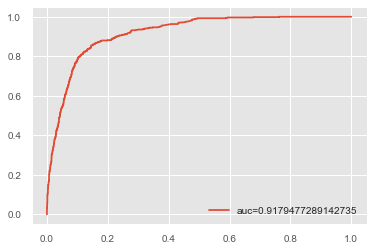

Text(0.5, 257.44, 'Predicted label')

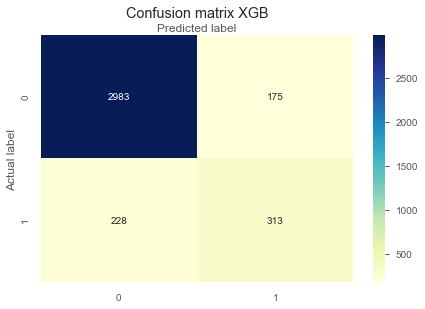

In [89]:
# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_test, y_XGB_pred))
print("")


#Can use classification report to assess model adequacy, too
print(metrics.classification_report(y_test, y_XGB_pred, labels=class_names))

#AUC for y1
y_XGB_pred_proba = XGB_class.predict_proba(X_test[lasso_best])[::,1]
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(y_test,  y_XGB_pred_proba)
auc_XGB = metrics.roc_auc_score(y_test, y_XGB_pred_proba)
plt.plot(fpr_XGB,tpr_XGB,label="auc="+str(auc_XGB))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_XGB = metrics.confusion_matrix(y_test, y_XGB_pred)
cnf_matrix_XGB
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_XGB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix XGB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Conclusion - With an F1 score of .89 the XGBoost model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

### 3.6 Neural Network Model (NN)
>   <b> F1 Score: </b> .89
<br><b> AUC: </b> .92
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model and run Forward Selection Feature Importance

In [90]:
# X_train, X_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test

# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# mlp = MLPClassifier(hidden_layer_sizes = (3,1),solver='sgd',learning_rate_init= 0.01, max_iter=50)
mlp= MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=(10), learning_rate='adaptive',      
learning_rate_init=0.01, max_iter=10, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=1000,       
shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=True)

In [91]:
# Source: https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f
# Use forward_selection to run Feature Importance
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [92]:
nn_feature_selection = forward_selection(X_train, y_train, significance_level=0.05)

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



#### Generate Test Data

In [93]:
# Train the model
mlp.fit(X_train[nn_feature_selection], y_train)

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.



MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='adaptive',
              learning_rate_init=0.01, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1000, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

#### Build/Assess the Model

In [94]:
#Build the Model
y_pred_nn = mlp.predict(X_test[nn_feature_selection])


MLP score is 0.894566098945661
Accuracy_nn: 0.894566098945661
[[2960  198]
 [ 192  349]]


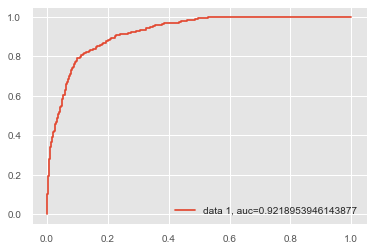

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3158
           1       0.64      0.65      0.64       541

    accuracy                           0.89      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.90      0.89      0.89      3699

Accuracy_svc: 0.894566098945661


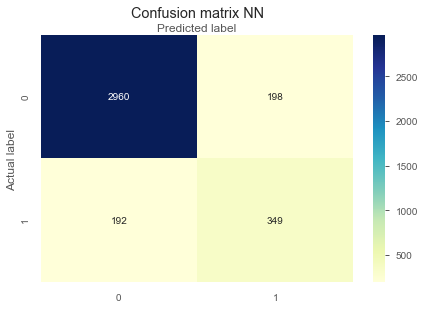

In [95]:
#Assess the Model
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test

print("MLP score is",mlp.score(X_test[nn_feature_selection],y_test))

# Accuracy for y NN
#print("y Accuracy NN:",metrics.accuracy_score(y_test, y_XGB_pred))
#print("")

###4. Step 4: Assess the Model
print("Accuracy_nn:",metrics.accuracy_score(y_test, y_pred_nn))
cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)

print(cnf_matrix_nn)

# Plot AOC
y_pred_proba_nn = mlp.predict_proba(X_test[nn_feature_selection])[::,1]
fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
plt.legend(loc=4)
plt.show()


class_names_nn=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_nn = np.arange(len(class_names_nn))
plt.xticks(tick_marks_nn, class_names_nn)
plt.yticks(tick_marks_nn, class_names_nn)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix NN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_nn))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_nn))

#Plot AOC
# y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
# fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
# auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
# plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
# plt.legend(loc=4)
# plt.show()

##### Conclusion - With an F1 score of .89 the NN model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

In [96]:
# THINK WE CAN DELETE THESE 2 BLOCKS

# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [97]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

### 3.7 Logistic Regression Model

>   <b> F1 Score: </b> .89
<br><b> AUC: </b> .91
<br><b> Next Steps: </b> Additional parameter tuning


#### Import Packages

In [98]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

#### Specify Modely and run Feature Selection

In [99]:
# Use SelectFromModel to run Feature Selection
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=10)
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

10 selected features
['PageValues_Log', 'Bounce_Exit_Rate_Avg_PageVales', 'Admin_Duration_percent_TotalDuration', 'Admin_per_PageValues', 'ProductRelated_per_PageValues', 'Exit_per_PageValues', 'Bounce_per_PageValues', 'Informational_per_PageValues_skew', 'Bounce_per_PageValues_skew', 'Quarter']


C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### Build/Assess the Model

In [100]:
# Build the Model
# fit the model with data
logreg.fit(X_train[embeded_lr_feature],y_train)

y_LR_pred=logreg.predict(X_test[embeded_lr_feature])

In [101]:
# Assess the Model
# import the metrics class for the Confusion Matrix
from sklearn import metrics
cnf_matrix_LogR = metrics.confusion_matrix(y_test, y_LR_pred)
cnf_matrix_LogR

array([[2962,  196],
       [ 197,  344]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

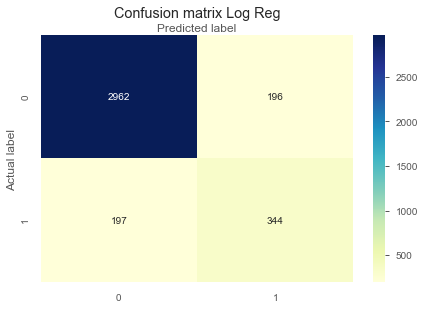

In [102]:
# Visualizing the Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Log Reg', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

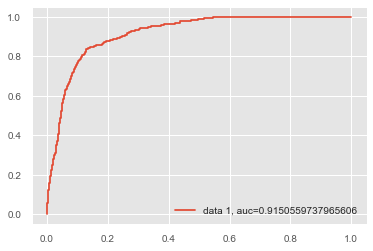

In [103]:
# ROC Curve
y_LR_pred_proba = logreg.predict_proba(X_test[embeded_lr_feature])[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test,  y_LR_pred_proba)
auc_LR = metrics.roc_auc_score(y_test, y_LR_pred_proba)
plt.plot(fpr_LR,tpr_LR,label="data 1, auc="+str(auc_LR))
plt.legend(loc=4)
plt.show()

In [104]:
print(metrics.classification_report(y_test, y_LR_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3158
           1       0.64      0.64      0.64       541

    accuracy                           0.89      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.89      0.89      0.89      3699



##### Conclusion - With an F1 score of .89 the Logistic Regression model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.